## 0. Install dependencies    

In [ ]:
!pip install -r requirements.txt

In [8]:
!pip install opendatasets
!pip install pandas

In [95]:
import opendatasets as od
import pandas
import matplotlib.pylab as plt
import pandas as pd
from glob import glob
import os
import xml.etree.ElementTree as ET
from collections import Counter


##  1. Download data

Detail about the dataset and how i created script for downloading the dataset through notebook
https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook/

In [6]:
od.download("https://www.kaggle.com/datasets/khlaifiabilel/military-aircraft-recognition-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tymofiij
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 1.13G/1.13G [16:51<00:00, 1.19MB/s]


## 2. Analyze data

Getting amount of files

In [61]:
annotations_horizontal_boxes = glob("military-aircraft-recognition-dataset/Annotations/Horizontal Bounding Boxes/*.xml")
annotations_oriented_boxes = glob("military-aircraft-recognition-dataset/Annotations/Horizontal Bounding Boxes/*.xml")
images = glob("military-aircraft-recognition-dataset\JPEGImages\*.jpg")
print(len(images))
print(len(annotations_horizontal))
print(len(annotations_oriented_boxes))

3842
3842
3842


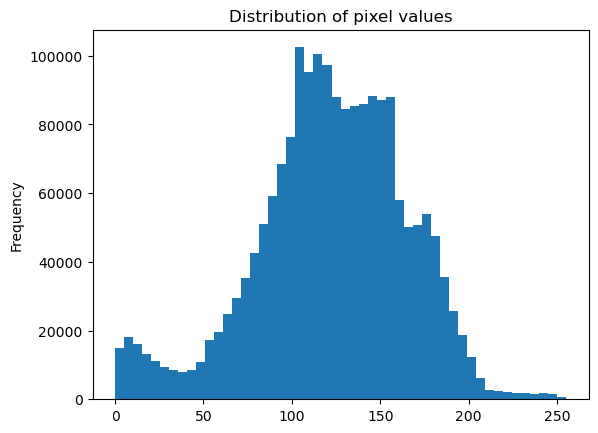

In [74]:
img = plt.imread(images[111])
pd.Series(img.flatten()).plot(kind="hist",bins=50, title = "Distribution of pixel values")
plt.show()

In [98]:
with open('military-aircraft-recognition-dataset/ImageSets/Main/test.txt', 'r') as file:
    numbers = [int(line.strip()) for line in file]
    names = []
    for i in numbers:
        annotation = annotations_horizontal_boxes[i]
        tree = ET.parse(annotation)
        root = tree.getroot()
        for object_element in root.findall('.//object'):
            name_element = object_element.find('name')
            if name_element is not None:
                names.append(name_element.text)
    print(names)

['A8', 'A8', 'A8', 'A8', 'A8', 'A16', 'A16', 'A5', 'A14', 'A14', 'A14', 'A14', 'A17', 'A17', 'A17', 'A17', 'A12', 'A12', 'A12', 'A12', 'A17', 'A12', 'A12', 'A12', 'A12', 'A10', 'A10', 'A10', 'A10', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A10', 'A2', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A19', 'A13', 'A13', 'A13', 'A13', 'A13', 'A13', 'A13', 'A13', 'A13', 'A13', 'A13', 'A13', 'A13', 'A13', 'A3', 'A14', 'A14', 'A18', 'A18', 'A9', 'A9', 'A9', 'A20', 'A20', 'A20', 'A20', 'A20', 'A20', 'A1', 'A1', 'A1', 'A14', 'A14', 'A14', 'A14', 'A14', 'A17', 'A17', 'A17', 'A17', 'A17', 'A1', 'A1', 'A1', 'A1', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A9', 'A11', 'A11', 'A7', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A5', 'A5', 'A5', 'A5', 'A5', 'A5', 'A19', 'A19', 

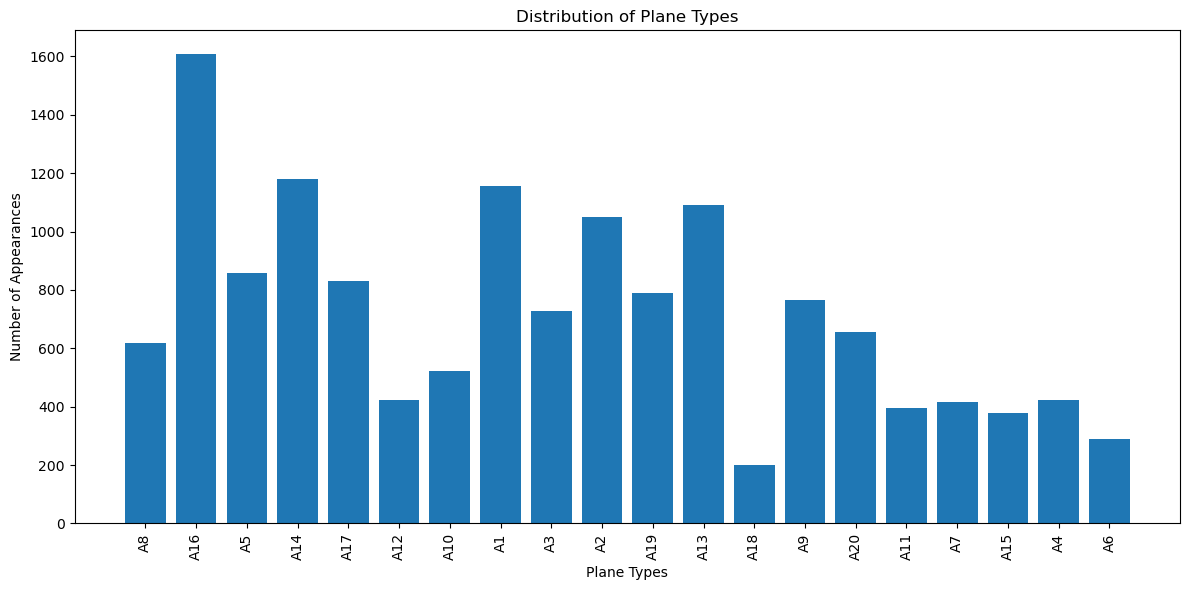

In [99]:
counter = Counter(names)

# Extract unique types and their counts
types = list(counter.keys())
counts = list(counter.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(types, counts)
plt.xlabel('Plane Types')
plt.ylabel('Number of Appearances')
plt.title('Distribution of Plane Types')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

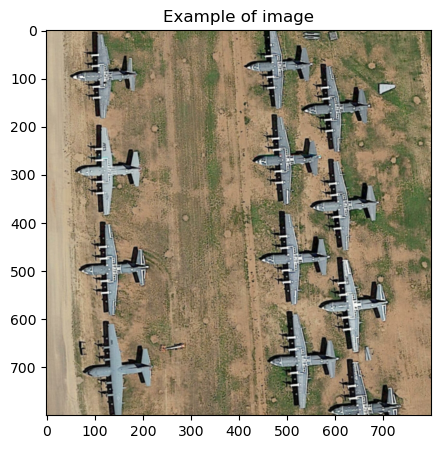

In [100]:
fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(img)
plt.title('Example of image')
plt.show()